In [16]:
import re
import nltk
import string
import os
import pandas as pd
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import SGDClassifier

from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
import contractions

In [2]:
train_path = "aclImdb/train/"  # source data
test_path = "aclImdb/imdb_te.csv"  # test data for grade evaluation.

In [3]:
def clean_txt(content):
    content=content.lower()
    content = regex1.sub(' ', content)
    content = regex2.sub(' ', content)
    content = regex3.sub(' ', content)
#    content = [contractions.fix(word) for word in content.split()]  # Replace contractions with expanded forms
    
    return content

In [55]:
import time

start_time = time.time()

regex1 = re.compile('<.*?>')
regex2 = re.compile('[%s0-9]' % re.escape(string.punctuation))
regex3 = re.compile('[^\x00-\x7F]')
path='aclImdb/train'
#open english stop words
stop_words = nltk.corpus.stopwords.words('english')
X=[]
Y_train=[]
def preprocessing (sentiment,sc):
    X=[]
    Y_train=[]
    sent_path= path+"/"+sentiment
    for file in os.listdir(sent_path):
        filepath = sent_path + '/'+ file
        inF = open(filepath, "r")
        content = inF.read().lower()
        inF.close()
        content=clean_txt(content)
        content_list = content.split()
        content = ' '.join(i for i in content_list if i not in stop_words)
    
        X.append(content)
        Y_train.append(sc)
    return(X,Y_train)

X,Y_train=preprocessing("pos",1)
x,y=preprocessing("neg",0)
end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")

X_train,Y_train=X+x,Y_train+y

dataset=list(zip(X+x,Y_train+y))
train_df=pd.DataFrame(data=dataset, columns=['text', 'polarity'])
    

Execution time: 63.756088972091675 seconds


In [52]:
# np.array(X_train)

In [14]:
from nltk.stem import WordNetLemmatizer
# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Define the text_normalizer function to process each string in the list
def text_normalizer(text):
    # Clean text    
    text = text.lower()  # Lowercase everything
    text = [contractions.fix(word) for word in text.split()]  # Replace contractions with expanded forms
    text = ' '.join(text)
    
    text = re.sub(r"[^a-zA-Z'']+", " ", text)  # Remove non-alphabetic characters
    tokens = word_tokenize(text)  # Tokenize the text
    tagged_sent = pos_tag(tokens)  # POS tagging
    lemmatized_sent = [lemmatizer.lemmatize(word, tag[0].lower()) if tag[0] in ['a', 's', 'r', 'n', 'v'] else word for word, tag in tagged_sent]  # Lemmatize based on POS tag
    
    return " ".join(lemmatized_sent)



In [56]:
start_time = time.time()
path='aclImdb/train'
#open english stop words
stop_words = nltk.corpus.stopwords.words('english')
X=[]
Y_train=[]
def preprocessing (sentiment,sc):
    X=[]
    Y_train=[]
    sent_path= path+"/"+sentiment
    for file in os.listdir(sent_path):
        filepath = sent_path + '/'+ file
        inF = open(filepath, "r")
        content = inF.read().lower()
        inF.close()
        content=text_normalizer(content)
        
        content_list = content.split()
        content = ' '.join(i for i in content_list if i not in stop_words)
    
        X.append(content)
        Y_train.append(sc)
    return(X,Y_train)

X_t,Y_t=preprocessing("pos",1)
x_u,y_u=preprocessing("neg",0)

end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")

X_train,Y_train=X_t+x_u,Y_t+y_u

dataset2=list(zip(X+x,Y_train+y))
df_1=pd.DataFrame(data=dataset2, columns=['text', 'polarity'])
    

Execution time: 520.6405401229858 seconds


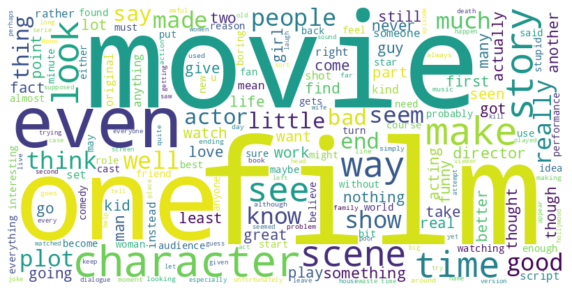

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join the cleaned strings into a single string
cleaned_reviews_ = " ".join(df_1["text"])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_reviews_)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


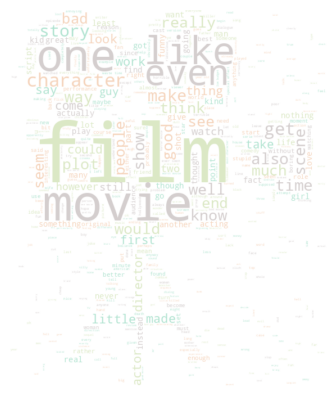

In [42]:
# Load the mask image
mask_image = "movie.png"


# Load the mask image as a NumPy array
mask = np.array(Image.open(mask_image))

def multi_color_func(word=None, font_size=None,
                     position=None, orientation=None,
                     font_path=None, random_state=None):
    colors = [[4, 7, 82],
              [25, 74, 85],
              [82, 43, 84],
              [158, 48, 79]]
    rand = random_state.randint(0, len(colors) - 1)
    return "hsl({}, {}%, {}%)".format(colors[rand][0], colors[rand][1], colors[rand][2])

wc = WordCloud(stopwords=stop_words,
               mask=mask, background_color="white",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0], color_func=multi_color_func)
wc.generate(cleaned_reviews_)
# Increase the size of the matplotlib figure
plt.figure(figsize=(5, 5), dpi=100)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [5]:
# X_test = []
# test_df = pd.read_csv(test_path, encoding="ISO-8859-1")
# test_df["text"]=test_df["text"].apply(clean_txt)

In [10]:
# #splitting data
# X_train, X_test, y_train, y_test = train_test_split(train_df["text"], train_df["polarity"], stratify=train_df["polarity"],test_size=.30, random_state=1)

In [6]:
from sklearn.model_selection import train_test_split, cross_val_score

""" unigram  """
unigram = CountVectorizer(stop_words=stop_words)
X_train_unigram = unigram.fit_transform(X_train)
X_test_unigram = unigram.transform(test_df["text"])

sgd1 = SGDClassifier(penalty='l1')
sgd1.fit(X_train_unigram, Y_train)
unigra_pred = sgd1.predict(X_test_unigram)

""" unigram with tfidf  """
tfidf_unigram = TfidfVectorizer(stop_words=stop_words)
X_train_tf_unigram = tfidf_unigram.fit_transform(X_train)
X_test_tf_unigram = tfidf_unigram.transform(test_df["text"])

sgd2 = SGDClassifier(penalty='l1')
sgd2.fit(X_train_tf_unigram, Y_train)
unigraTFIDF_pred = sgd2.predict(X_test_tf_unigram)

""" bigram  """
bigram = CountVectorizer(ngram_range=(2, 2), stop_words=stop_words)
X_train_bigram = bigram.fit_transform(X_train)
X_test_bigram = bigram.transform(test_df["text"])

sgd3 = SGDClassifier(penalty='l1')
sgd3.fit(X_train_bigram, Y_train)
bia_pred = sgd3.predict(X_test_bigram)

""" bigram with tfidf  """
tfidf_bigram = TfidfVectorizer(ngram_range=(2, 2), stop_words=stop_words)
X_train_tf_bigram = tfidf_bigram.fit_transform(X_train)
X_test_tf_bigram = tfidf_bigram.transform(test_df["text"])

sgd4 = SGDClassifier(penalty='l1')
sgd4.fit(X_train_tf_bigram, Y_train)
biaTFIDF_pred = sgd4.predict(X_test_tf_bigram)

In [9]:
print((cross_val_score(sgd1, X_train_unigram, Y_train, cv=5)).mean())
print((cross_val_score(sgd3, X_train_bigram, Y_train, cv=5)).mean())
print((cross_val_score(sgd2, X_train_tf_unigram, Y_train, cv=5).mean()))
print((cross_val_score(sgd4, X_train_tf_bigram, Y_train, cv=5)).mean())

0.84984
0.77756
0.8687999999999999
0.6997200000000001


In [11]:
print((cross_val_score(sgd1, X_train_unigram, Y_train, cv=5)).mean())
print((cross_val_score(sgd3, X_train_bigram, Y_train, cv=5)).mean())
print((cross_val_score(sgd2, X_train_tf_unigram, Y_train, cv=5).mean()))
print((cross_val_score(sgd4, X_train_tf_bigram, Y_train, cv=5)).mean())


0.852
0.7771199999999999
0.8692400000000001
0.7033599999999999


In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader

# # Example dataset (replace this with your own labeled dataset)
# reviews = [
#     ("I love this product! It's amazing.", 1),     # Positive review (label 1)
#     ("This product is terrible. Do not buy.", 0),  # Negative review (label 0)
#     # Add more reviews and labels here...
# ]

# Define hyperparameters and settings
MAX_LENGTH = 128
BATCH_SIZE = 16
EPOCHS = 5

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Prepare data
inputs = [review[0] for review in reviews]
labels = [review[1] for review in reviews]

# Tokenize input texts and convert to PyTorch tensors
inputs_encoded = tokenizer(inputs, padding=True, truncation=True, max_length=MAX_LENGTH, return_tensors='pt')
input_ids = inputs_encoded['input_ids']
attention_mask = inputs_encoded['attention_mask']
labels_tensor = torch.tensor(labels, dtype=torch.long)

# Split data into training and testing sets (you can also use a separate test dataset)
train_size = int(0.8 * len(inputs))
train_inputs, test_inputs = input_ids[:train_size], input_ids[train_size:]
train_masks, test_masks = attention_mask[:train_size], attention_mask[train_size:]
train_labels, test_labels = labels_tensor[:train_size], labels_tensor[train_size:]

# Prepare optimizer and loss function
optimizer = AdamW(model.parameters(), lr=2e-5)
loss_fn = torch.nn.CrossEntropyLoss()

# Fine-tuning
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0

    # Create a DataLoader for the training set
    train_data = torch.utils.data.TensorDataset(train_inputs, train_masks, train_labels)
    train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

    for batch in train_loader:
        batch_inputs, batch_masks, batch_labels = batch
        batch_inputs, batch_masks, batch_labels = batch_inputs.to(device), batch_masks.to(device), batch_labels.to(device)

        optimizer.zero_grad()
        outputs = model(input_ids=batch_inputs, attention_mask=batch_masks, labels=batch_labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch + 1}/{EPOCHS}, Loss: {total_loss / len(train_loader)}")

# Evaluation
model.eval()
correct_predictions = 0
total_predictions = 0

# Create a DataLoader for the test set
test_data = torch.utils.data.TensorDataset(test_inputs, test_masks, test_labels)
test_loader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

with torch.no_grad():
    for batch in test_loader:
        batch_inputs, batch_masks, batch_labels = batch
        batch_inputs, batch_masks, batch_labels = batch_inputs.to(device), batch_masks.to(device), batch_labels.to(device)

        outputs = model(input_ids=batch_inputs, attention_mask=batch_masks)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=1)
        correct_predictions += torch.sum(predictions == batch_labels).item()
        total_predictions += batch_labels.size(0)

accuracy = correct_predictions / total_predictions
print(f"Test Accuracy: {accuracy:.4f}")


In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score,confusion_matrix,f1_score,recall_score

ac=clf.score(x_test,y_test)
print("Accuracy: ",ac)

y_pred=clf.predict(x_test)
prec = precision_score(y_test, y_pred, average='macro')
print("Precision: ",prec)

f1=f1_score(y_test, y_pred, average='macro')
print( "F1 Score",f1)

recall = recall_score(y_test, y_pred, average='macro')
print( "Recall",f1)

all_results.append(["Stratify", ac, prec, f1, recall])